# HR ATTRITION ANALYSIS

In [115]:
import pandas as pd
import numpy as np  
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
pd.set_option('display.max_columns', None)

In [117]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [119]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [120]:
df.shape

(1470, 35)

In [121]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [122]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [123]:
df.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [124]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [125]:
df.duplicated().sum()

0

In [126]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Data Visualisation

In [127]:
px.pie(df, names='JobRole', title='Job Role',height=500)

In [128]:
px.bar(df,x='JobRole', y='BusinessTravel',facet_col='BusinessTravel',color='JobRole', 
       title='Business Travel by Job Role',
       width=1000,height=600)

In [129]:
px.violin(df, x='JobRole', y='MonthlyIncome', color='JobRole',facet_col='Gender',
          title='Monthly Income by Job Role',
          width=1100,height=600)

In [130]:
px.histogram(df,x='JobRole',y='JobSatisfaction',facet_col='Attrition',color='JobRole',
             title='Job Satisfaction by Job Role',
             width=1000,height=600)

In [131]:
px.bar(df,x='Age',y='MaritalStatus',facet_col='Gender',color='Attrition',
       title='Marital Status by Age',
       width=1000,height=600)

In [132]:
px.histogram(df,x='Age',y='JobSatisfaction',color='Gender',
             title='Job Satisfaction by Age',
             width=1000,height=600)

In [133]:
px.scatter(df,x='Age',y='YearsAtCompany',facet_col='Attrition',
           title='Years at Company by Age',
           width=1000,height=600)

In [134]:
px.histogram(df,x='MonthlyIncome',y='PercentSalaryHike',facet_col='Gender',
             title='Percent Salary Hike by Monthly Income',
             width=1000,height=600) 

In [135]:
px.treemap(df,path=['JobRole','OverTime','JobSatisfaction'],values='MonthlyIncome',
           title='Job Satisfaction by Job Role and Overtime',
           width=1100,height=600)

In [136]:
px.treemap(df,path=['EducationField','Department','JobRole'],values='MonthlyRate',
           title='Montly rate by educational field and department',
           width=1100,height=600)

In [137]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


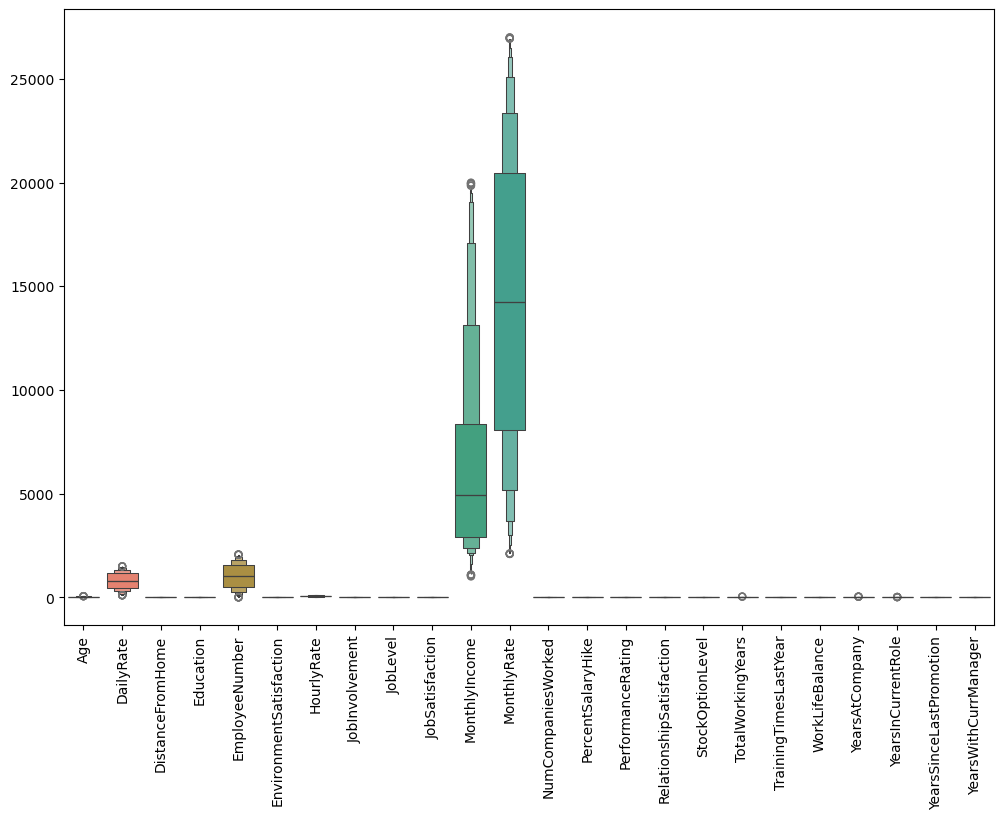

In [138]:
plt.figure(figsize=[12,8])
sns.boxenplot(df)
plt.xticks(rotation=90);

In [139]:
for col in df.columns:
    if df[col].dtype!='object':
        print('Feature :',col)
        print(df[col].value_counts())
        print('\n')

Feature : Age
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Feature : DailyRate
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Feature : DistanceFromHome
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64


Feature : Education
Educ

In [140]:
for col in df.columns:
    if df[col].dtype=='object':
        print('Feature :',col)
        print(df[col].value_counts())
        print('\n')

Feature : Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Feature : BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Feature : Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


Feature : EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Feature : Gender
Gender
Male      882
Female    588
Name: count, dtype: int64


Feature : JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: c

### Encoding

In [141]:
df['JobRole']=pd.Categorical(df['JobRole']).codes
df['EducationField']=pd.Categorical(df['EducationField']).codes
df['BusinessTravel']=pd.Categorical(df['BusinessTravel']).codes
df['MaritalStatus']=pd.Categorical(df['MaritalStatus']).codes
df['Attrition']=pd.Categorical(df['Attrition']).codes
df['Department']=pd.Categorical(df['Department']).codes

In [142]:
df=pd.get_dummies(df,columns=['OverTime'],drop_first=True,dtype=int)

In [143]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True,dtype=int)

In [144]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,Gender_Male
0,41,1,2,1102,2,1,2,1,1,2,94,3,2,7,4,2,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0
1,49,0,1,279,1,8,1,1,2,3,61,2,2,6,2,1,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1
2,37,1,2,1373,1,2,2,4,4,4,92,2,1,2,3,2,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1
3,33,0,1,1392,1,3,4,1,5,4,56,3,1,6,3,1,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0
4,27,0,2,591,1,2,1,3,7,1,40,3,1,2,2,1,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1


### Scaling

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
SC=StandardScaler()

In [147]:
columns = ['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']
for i in columns:
    df[i] =SC.fit_transform(df[[i]])

In [148]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,Gender_Male
0,0.446350,1,2,0.742527,2,1,2,1,1,2,1.383138,3,2,7,4,2,-0.108350,0.726020,8,11,3,1,0,8,0,1,6,4,0,5,1,0
1,1.322365,0,1,-1.297775,1,8,1,1,2,3,-0.240677,2,2,6,2,1,-0.291719,1.488876,1,23,4,4,1,10,3,3,10,7,1,7,0,1
2,0.008343,1,2,1.414363,1,2,2,4,4,4,1.284725,2,1,2,3,2,-0.937654,-1.674841,6,15,3,2,0,7,3,3,0,0,0,0,1,1
3,-0.429664,0,1,1.461466,1,3,4,1,5,4,-0.486709,3,1,6,3,1,-0.763634,1.243211,1,11,3,3,0,8,3,3,8,7,3,0,1,0
4,-1.086676,0,2,-0.524295,1,2,1,3,7,1,-1.274014,3,1,2,2,1,-0.644858,0.325900,9,12,3,4,1,6,3,3,2,2,2,2,0,1


### Split the data for validation

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

In [152]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,Gender_Male
0,0.446350,2,0.742527,2,1,2,1,1,2,1.383138,3,2,7,4,2,-0.108350,0.726020,8,11,3,1,0,8,0,1,6,4,0,5,1,0
1,1.322365,1,-1.297775,1,8,1,1,2,3,-0.240677,2,2,6,2,1,-0.291719,1.488876,1,23,4,4,1,10,3,3,10,7,1,7,0,1
2,0.008343,2,1.414363,1,2,2,4,4,4,1.284725,2,1,2,3,2,-0.937654,-1.674841,6,15,3,2,0,7,3,3,0,0,0,0,1,1
3,-0.429664,1,1.461466,1,3,4,1,5,4,-0.486709,3,1,6,3,1,-0.763634,1.243211,1,11,3,3,0,8,3,3,8,7,3,0,1,0
4,-1.086676,2,-0.524295,1,2,1,3,7,1,-1.274014,3,1,2,2,1,-0.644858,0.325900,9,12,3,4,1,6,3,3,2,2,2,2,0,1


In [153]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int8

In [154]:
X_train.shape

(1029, 31)

In [155]:
X_test.shape

(441, 31)

In [156]:
y_train.shape

(1029,)

In [157]:
y_test.shape

(441,)

In [158]:
y_train.value_counts(normalize=True)

Attrition
0    0.838678
1    0.161322
Name: proportion, dtype: float64

In [159]:
y_test.value_counts(normalize=True)

Attrition
0    0.839002
1    0.160998
Name: proportion, dtype: float64

### Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logistic_model=LogisticRegression()

In [162]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [163]:
logistic_model.score(X_train,y_train)

0.8542274052478134

In [164]:
logistic_model.score(X_test,y_test)

0.8571428571428571

### Confusion matrix and Classification report

In [165]:
from sklearn.metrics import confusion_matrix,classification_report

In [166]:
ytrain_predict=logistic_model.predict(X_train)
ytest_predict=logistic_model.predict(X_test)

#### Confusion Matrix

<Axes: >

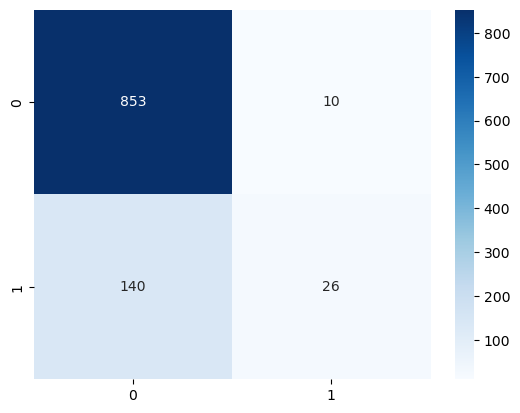

In [167]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g',cmap='Blues')

<Axes: >

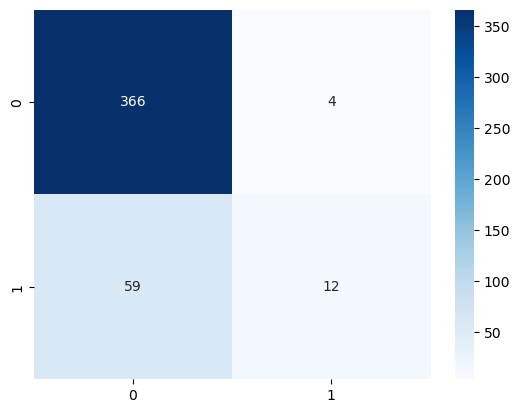

In [168]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='g',cmap='Blues')

#### Classification matrix

In [169]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       863
           1       0.72      0.16      0.26       166

    accuracy                           0.85      1029
   macro avg       0.79      0.57      0.59      1029
weighted avg       0.84      0.85      0.81      1029



In [170]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.75      0.17      0.28        71

    accuracy                           0.86       441
   macro avg       0.81      0.58      0.60       441
weighted avg       0.84      0.86      0.82       441



### AUC report and ROC curve

In [171]:
from sklearn.metrics import roc_auc_score,roc_curve

In [172]:
probs = logistic_model.predict_proba(X_train)

In [173]:
probs = probs[:,1]

In [174]:
AUC = roc_auc_score(y_train,probs)
print(f'the AUC score is: {AUC}')

the AUC score is: 0.8164779628362814


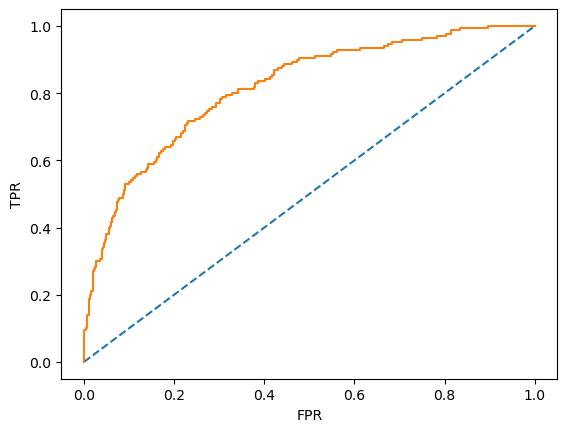

In [175]:
fpr,tpr,threshold = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [176]:
probs = logistic_model.predict_proba(X_test)
probs = probs[:,1]

In [177]:
AUC = roc_auc_score(y_test,probs)
print(f'the AUC score is: {AUC}')

the AUC score is: 0.7591549295774648


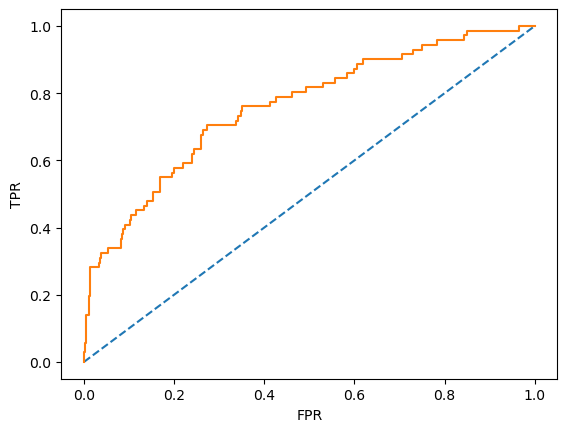

In [178]:
fpr,tpr,threshold = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

### Grid Search cross validation

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
logit = LogisticRegression(max_iter = 10000,random_state=1)

In [181]:
grid = {'penalty': ['l1','l2'],
       'C':[0.1,0.01,1.0,10],
       'solver': ['lbfgs','sag','saga'],
       'tol':[0.1,0.01,0.001,0.0001]}

In [182]:
grid_search = GridSearchCV( estimator = logit, param_grid = grid, cv = 10 )

In [183]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=1),
             param_grid={'C': [0.1, 0.01, 1.0, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001, 0.0001]})

In [184]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [185]:
best_model = grid_search.best_estimator_

In [186]:
best_model.score(X_train,y_train)

0.8775510204081632

In [187]:
best_model.score(X_test,y_test)

0.8639455782312925

In [188]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

<Axes: >

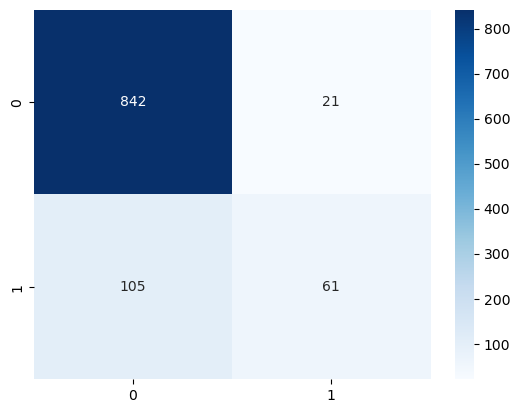

In [189]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g',cmap='Blues')

<Axes: >

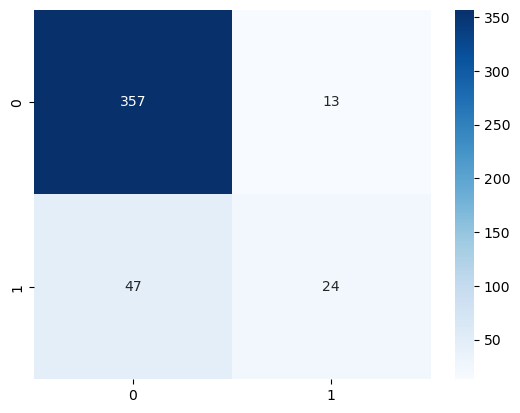

In [190]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='g',cmap='Blues')

In [191]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       863
           1       0.74      0.37      0.49       166

    accuracy                           0.88      1029
   macro avg       0.82      0.67      0.71      1029
weighted avg       0.87      0.88      0.86      1029



In [192]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.65      0.34      0.44        71

    accuracy                           0.86       441
   macro avg       0.77      0.65      0.68       441
weighted avg       0.85      0.86      0.85       441



### Adding class weight

In [193]:
bal_model = LogisticRegression(max_iter=10000,C=0.1,penalty = 'l2',tol=0.01,solver='sag',class_weight='balanced',random_state=1)

In [194]:
bal_model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,
                   random_state=1, solver='sag', tol=0.01)

In [195]:
ytrain_predict = bal_model.predict(X_train)
ytest_predict = bal_model.predict(X_test)

<Axes: >

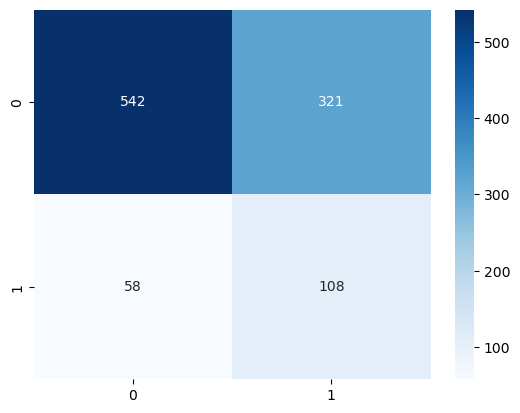

In [196]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g',cmap='Blues')

<Axes: >

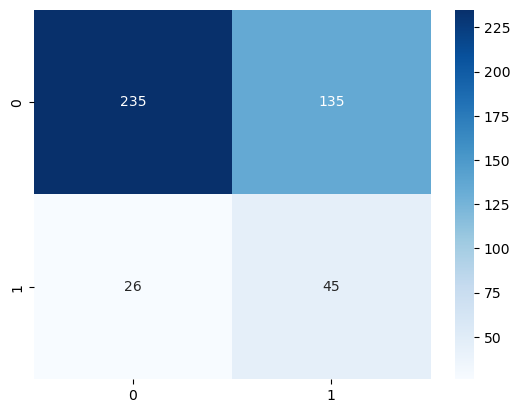

In [197]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='g',cmap='Blues')

In [198]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       863
           1       0.25      0.65      0.36       166

    accuracy                           0.63      1029
   macro avg       0.58      0.64      0.55      1029
weighted avg       0.80      0.63      0.68      1029



In [199]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.64      0.74       370
           1       0.25      0.63      0.36        71

    accuracy                           0.63       441
   macro avg       0.58      0.63      0.55       441
weighted avg       0.80      0.63      0.68       441



# Deploying ML model in pickle file

In [200]:
import pickle

In [201]:
with open('bal_model.pkl', 'wb') as f:
    pickle.dump(bal_model, f)

In [202]:
pickle_in = pickle.load(open('bal_model.pkl', 'rb'))

In [203]:
pickle_in.score(X_test,y_test)

0.6349206349206349